In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import ttest_ind
#import pybedtools
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FuncFormatter

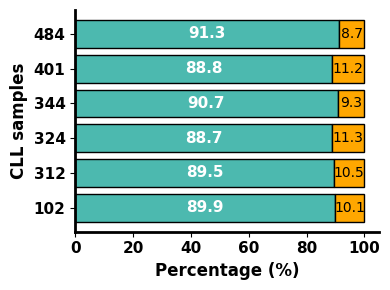

In [2]:
#K562 model to test CLL samples
dirPre = 'Samples/CLL/HiC/Pre'
#prefiles = os.listdir(dirPre)
prefiles = ['102','312','324','344','401', '484']
correct_predictions1 = []
incorrect_predictions1 = []
methods = []

for file in prefiles:
    dfPre = pd.read_csv(dirPre+f'/{file}_bins_LRfea.csv.pred_out.txt')
    #print(file)
    methods.append(file.split('_')[0])
    
    prenum = dfPre[dfPre['Value'] >= 0.17].shape[0]
    
    correct_predictions1.append(prenum)
    
    incorrect_predictions1.append(dfPre.shape[0]-prenum)


correct_predictions = np.array(correct_predictions1)
incorrect_predictions = np.array(incorrect_predictions1)

# 总样本数
total_samples = correct_predictions + incorrect_predictions


fig, ax = plt.subplots(figsize=(4,3))


ax.barh(methods, correct_predictions / total_samples * 100, label='Predicted', color='#4cb9af', edgecolor='black') #9fdbac #e9a8e8 #417DC1

# 绘制预测错误的部分
ax.barh(methods, incorrect_predictions / total_samples * 100, left=correct_predictions / total_samples * 100, color='#FFA700', edgecolor='black')

plt.xlabel('Percentage (%)',fontsize=12,fontweight='bold')
plt.ylabel('CLL samples',fontsize=12,fontweight='bold')
#plt.legend()
#ax.legend(loc='lower left',prop={'weight': 'bold','size':13})

# 在每个条形上添加百分比标签
for index, (cp, ip) in enumerate(zip(correct_predictions, incorrect_predictions)):
    total = cp + ip
    cp_pct = cp / total * 100
    ip_pct = ip / total * 100
    plt.text(cp_pct / 2, index, f'{cp_pct:.1f}', ha='center', va='center', color='white',fontsize=11,fontweight='bold')
    plt.text(cp_pct + ip_pct / 2, index, f'{ip_pct:.1f}', ha='center', va='center', color='black',fontsize=10)


ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 
 

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')

plt.tight_layout()
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/CLL_pre.png',dpi=300, bbox_inches='tight')


plt.show()


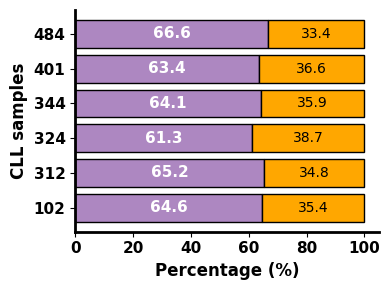

In [3]:
#GM12878 model to test CLL samples
dirPre = 'Samples/CLL/HiC/Pre'
#prefiles = os.listdir(dirPre)
correct_predictions1 = []
incorrect_predictions1 = []
methods = []

prefiles = ['102','312','324','344','401', '484']

for file in prefiles:
    dfPre = pd.read_csv(dirPre+f'/{file}_bins_LRfea.csv.GM12878.pred_out.txt')
    #print(file)
    methods.append(file.split('_')[0])
    
    prenum = dfPre[dfPre['Value'] >= 0.17].shape[0]
    
    correct_predictions1.append(prenum)
    
    incorrect_predictions1.append(dfPre.shape[0]-prenum)


correct_predictions = np.array(correct_predictions1)
incorrect_predictions = np.array(incorrect_predictions1)

# 总样本数
total_samples = correct_predictions + incorrect_predictions


fig, ax = plt.subplots(figsize=(4,3))


ax.barh(methods, correct_predictions / total_samples * 100, label='Predicted', color='#AD87C1', edgecolor='black') #9fdbac #e9a8e8 #946EAC

# 绘制预测错误的部分
ax.barh(methods, incorrect_predictions / total_samples * 100, left=correct_predictions / total_samples * 100, color='#FFA700', edgecolor='black')

plt.xlabel('Percentage (%)',fontsize=12,fontweight='bold')
plt.ylabel('CLL samples',fontsize=12,fontweight='bold')
#plt.legend()
#ax.legend(loc='lower left',prop={'weight': 'bold','size':13})

# 在每个条形上添加百分比标签
for index, (cp, ip) in enumerate(zip(correct_predictions, incorrect_predictions)):
    total = cp + ip
    cp_pct = cp / total * 100
    ip_pct = ip / total * 100
    plt.text(cp_pct / 2, index, f'{cp_pct:.1f}', ha='center', va='center', color='white',fontsize=11,fontweight='bold')
    plt.text(cp_pct + ip_pct / 2, index, f'{ip_pct:.1f}', ha='center', va='center', color='black',fontsize=10)


ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 
 

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')

plt.tight_layout()
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/CLL_pre.GM12878.png',dpi=300, bbox_inches='tight')


plt.show()


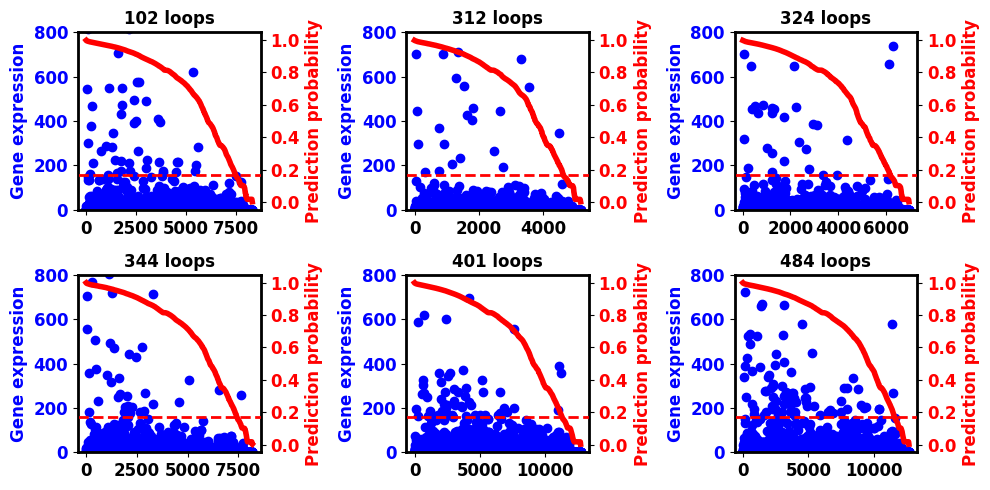

In [6]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

names = ['102', '312', '324', '344', '401', '484']

# 创建一个2行3列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs = axs.flatten()  # 将axs数组扁平化，便于使用索引

for idx, name in enumerate(names):
    loop = pd.read_csv(f'Samples/CLL/HiC/{name}_merged_loops_2.bedpe', sep='\t')
    pre = pd.read_csv(f'Samples/CLL/HiC/Pre/{name}_bins_LRfea.csv.pred_out.txt')
    loop['pre'] = pre['Value']

    fea = pd.read_csv(f'Samples/CLL/fea/{name}_1D_LRfea_tpm.csv')
    row_means = fea.mean(axis=1)
    loop['mean'] = row_means
    df_sorted = loop.sort_values(by='pre', ascending=False)
    df_sorted['rank'] = range(df_sorted.shape[0])

    x = np.array(df_sorted['rank'])
    y2 = np.array(df_sorted['mean'])
    y1 = np.array(df_sorted['pre'])

    ax1 = axs[idx]
    
    # 绘制散点图，使用主轴
    ax1.scatter(x, y2, color='b', label='')
    ax1.set_title(f'{name} loops',fontsize=12,fontweight='bold')
    #ax1.set_xlabel(f'{name} loops', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Gene expression', color='b', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(0, 800)

    # 创建第二纵轴
    ax2 = ax1.twinx()
    ax2.plot(x, y1, 'r-', linewidth=4)
    ax2.set_ylabel('Prediction probability', color='r', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.axhline(y=0.17, color='red', linestyle='--', linewidth=2)

    ax1.spines['top'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['left'].set_linewidth(2)

    for label in ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels():
        label.set_fontsize(12)
        label.set_fontweight('bold')

plt.tight_layout()  # 调整子图布局
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/Ind/combined_GE_Pre.png', dpi=300, bbox_inches='tight')
plt.show()


102
37.559 33.502
312
48.089 45.63
324
42.604 37.733
344
40.758 37.736
401
36.898 32.354
484


/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76899/279140694.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topdf['label'] = ['High' for i in range(topdf.shape[0])]
/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76899/279140694.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lastdf['label'] = ['Low' for i in range(lastdf.shape[0])]
/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76899/279140694.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `err

35.967 31.253


/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76899/279140694.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  strip_plot = sns.stripplot(x='label', y='score', data=toplast, jitter=0.35,size=4, palette = colors_hex,edgecolor='black', linewidth=0.3,ax = axs[x])


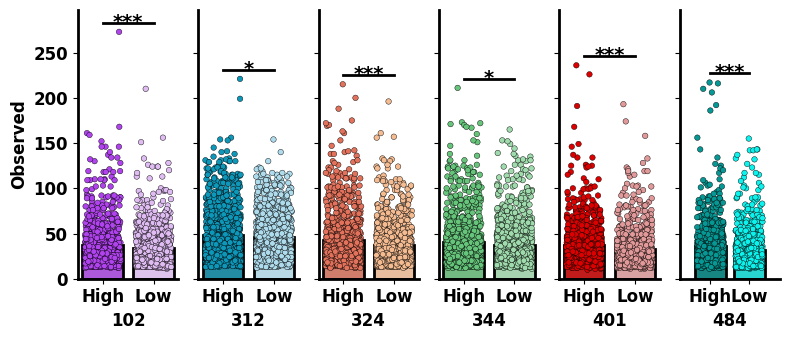

In [7]:
names = ['102','312','324','344','401', '484']
#colors = ['blue', 'green','red','purple','orange','#fe6d54']
cmapColor = ['#dfbcf2','#AFDCEC','#F5BC92','#9fdbac','#e29999','#0cf2ec']
violinColor = ['#b143ee','#0D98BA','#E2725B','#66c57b','#dc0000','#059894']
#紫 蓝 橘 绿 红 


colors = ['#77C6C6','#FA7952','#8EC58C','#AD87C1','red','orange']
#names = ['102']

fig, axs = plt.subplots(1, 6, sharey=True, figsize=(8, 3.5))

x = 0
for name in names:
    print(name)
    loop = pd.read_csv(f'Samples/CLL/HiC/{name}_merged_loops_2.bedpe',sep='\t')
    #loop = pd.read_csv(f'HiC/{name}_merged_loops.bedpe',comment='#',sep='\t')
    pre = pd.read_csv(f'Samples/CLL/HiC/Pre/{name}_bins_LRfea.csv.pred_out.txt')
    loop['pre'] = pre['Value']
    # loop['L'] = fea['L0']
    # loop['R'] = fea['R0']
    fea = pd.read_csv(f'Samples/CLL/fea/{name}_1D_LRfea_tpm.csv')
    # fea1 = fea.drop('label', axis=1)
    row_means = fea.mean(axis=1)
    
    loop['mean'] = row_means
    df_sorted = loop.sort_values(by='pre', ascending=False)
    df_sorted['rank'] = [i for i in range(df_sorted.shape[0])]
    topdf = df_sorted[df_sorted['rank']<1000]
    lastdf = df_sorted[df_sorted['rank']>df_sorted.shape[0]-1000-1]
    print(topdf['score'].mean(),lastdf['score'].mean())
    topdf['label'] = ['High' for i in range(topdf.shape[0])]
    lastdf['label'] = ['Low' for i in range(lastdf.shape[0])]
    toplast = pd.concat([topdf,lastdf],axis=0)

    
    #colors_hex = ['blue', 'green','red','purple','orange','black','#fe6d54']
    #colors_hex = ['#94C9AD', '#fe6d54']
    colors_hex = [violinColor[x],cmapColor[x]]
    t_stat, p_value = ttest_ind(topdf['score'], lastdf['score'])
    #print(p_value)
    
    #ax.text(0.5, toplast['score'].max() + 0.1, f'p = {p_value:.2e}', ha='center', va='bottom')
    
    bar_plot = sns.barplot(x='label', y='score', data=toplast,ci='sd', palette=colors_hex,width=0.8,edgecolor='black',linewidth=2, ax = axs[x])
    strip_plot = sns.stripplot(x='label', y='score', data=toplast, jitter=0.35,size=4, palette = colors_hex,edgecolor='black', linewidth=0.3,ax = axs[x])
    
    
    # 添加 p 值注释
    # 根据 p 值确定星号标记
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'n.s.'
    
    # 获取条形图的位置信息
    x_coords = [p.get_x() + p.get_width() / 2 for p in bar_plot.patches]
    max_height = toplast['score'].max()
    #print(max_height,x_coords)
    
    if significance != 'n.s.':
        axs[x].plot(x_coords, [max_height + 10] * len(x_coords), color='black', lw=2)  # 横线
        axs[x].text(0.5, max_height + 0.12, f'{significance}', ha='center', va='bottom',fontsize=14,fontweight='bold')  # p值和星号
    
    plt.xlim(-0.8, 1.8)
    
    for label in axs[x].get_xticklabels():
        label.set_fontsize(12)
        label.set_fontweight('bold')
    
    axs[x].set_xlabel(f'{name}',fontsize=12,fontweight='bold')
    axs[x].set_ylabel('',fontsize=12,fontweight='bold')
    
    axs[x].spines['top'].set_linewidth(0)
    axs[x].spines['right'].set_linewidth(0)
    axs[x].spines['bottom'].set_linewidth(2)
    axs[x].spines['left'].set_linewidth(2)
    x+=1
    
for label in axs[0].get_yticklabels():
    label.set_fontsize(12)
    label.set_fontweight('bold')
axs[0].set_ylabel('Observed',fontsize=12,fontweight='bold')
plt.tight_layout()
#plt.savefig(f'figs/Ind/TopLasr_Obser.png',dpi=300, bbox_inches='tight')

plt.show()
    



[5811 2868 1720  356]


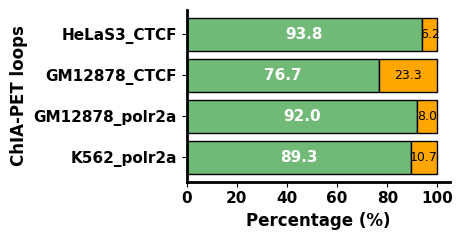

In [4]:
#Models to test ChIA-PET TSS loops 


dirPre = 'binsFea/ChIA-PET/loop_data/TSSloop'
#prefiles = os.listdir(dirPre)
prefiles = ['K562_polr2a.binsGEfea.csv.Pre.txt','GM12878_polr2a.binsGEfea.csv.Pre.txt','GM12878_CTCF.binsGEfea.csv.Pre.txt','HeLaS3_CTCF.binsGEfea.csv.Pre.txt']
correct_predictions1 = []
incorrect_predictions1 = []
methods = []


for file in prefiles:
    dfPre = pd.read_csv(dirPre+'/'+file)
    #print(file)
    methods.append(file.split('.')[0])
    
    prenum = dfPre[dfPre['Value'] >= 0.17].shape[0]
    
    correct_predictions1.append(prenum)
    
    incorrect_predictions1.append(dfPre.shape[0]-prenum)


correct_predictions = np.array(correct_predictions1)
incorrect_predictions = np.array(incorrect_predictions1)

# 总样本数
total_samples = correct_predictions + incorrect_predictions
print(total_samples)

fig, ax = plt.subplots(figsize=(4.7,2.5))


ax.barh(methods, correct_predictions / total_samples * 100, label='Predicted', color='#70B976', edgecolor='black') #9fdbac #e9a8e8 #946EAC

# 绘制预测错误的部分
ax.barh(methods, incorrect_predictions / total_samples * 100, left=correct_predictions / total_samples * 100, color='#FFA700', edgecolor='black')

plt.xlabel('Percentage (%)',fontsize=12,fontweight='bold')
plt.ylabel('ChIA-PET loops',fontsize=12,fontweight='bold')
#plt.legend()
#ax.legend(loc='lower left',prop={'weight': 'bold','size':13})

# 在每个条形上添加百分比标签
for index, (cp, ip) in enumerate(zip(correct_predictions, incorrect_predictions)):
    total = cp + ip
    cp_pct = cp / total * 100
    ip_pct = ip / total * 100
    plt.text(cp_pct / 2, index, f'{cp_pct:.1f}', ha='center', va='center', color='white',fontsize=11,fontweight='bold')
    plt.text(cp_pct + ip_pct / 2, index, f'{ip_pct:.1f}', ha='center', va='center', color='black',fontsize=9)


ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 
 

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')

plt.tight_layout()
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/ChiA-PET_indTest.TSS2.png',dpi=300, bbox_inches='tight')


plt.show()

[3313 2288]


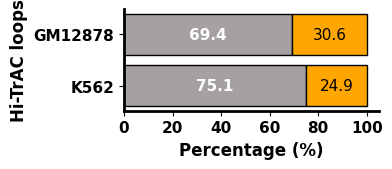

In [5]:
#Models to test Hi-TrAC TSS loops 

dirPre = 'binsFea/HiTrAC/TSSloops/'
prefiles = ['K562.loop.overlap.TSS.bedpe.binsGEfea.csv.Pre.txt','GM12878.loop.overlap.TSS.bedpe.binsGEfea.csv.Pre.txt']
correct_predictions1 = []
incorrect_predictions1 = []
methods = []


for file in prefiles:
    dfPre = pd.read_csv(dirPre+'/'+file)
    #print(file)
    methods.append(file.split('.')[0])
    
    prenum = dfPre[dfPre['Value'] >= 0.17].shape[0]
    
    correct_predictions1.append(prenum)
    
    incorrect_predictions1.append(dfPre.shape[0]-prenum)


correct_predictions = np.array(correct_predictions1)
incorrect_predictions = np.array(incorrect_predictions1)

# 总样本数
total_samples = correct_predictions + incorrect_predictions
print(total_samples)

fig, ax = plt.subplots(figsize=(4,1.8))


ax.barh(methods, correct_predictions / total_samples * 100, label='Predicted', color='#a5a1a0', edgecolor='black') #9fdbac #e9a8e8 #946EAC

# 绘制预测错误的部分
ax.barh(methods, incorrect_predictions / total_samples * 100, left=correct_predictions / total_samples * 100, color='#FFA700', edgecolor='black')

plt.xlabel('Percentage (%)',fontsize=12,fontweight='bold')
plt.ylabel('Hi-TrAC loops',fontsize=12,fontweight='bold')
#plt.legend()
#ax.legend(loc='lower left',prop={'weight': 'bold','size':13})

# 在每个条形上添加百分比标签
for index, (cp, ip) in enumerate(zip(correct_predictions, incorrect_predictions)):
    total = cp + ip
    cp_pct = cp / total * 100
    ip_pct = ip / total * 100
    plt.text(cp_pct / 2, index, f'{cp_pct:.1f}', ha='center', va='center', color='white',fontsize=11,fontweight='bold')
    plt.text(cp_pct + ip_pct / 2, index, f'{ip_pct:.1f}', ha='center', va='center', color='black',fontsize=11)


ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 
 

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')

plt.tight_layout()
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/Hi-TrAC_indTest.TSS2.png',dpi=300, bbox_inches='tight')


plt.show()

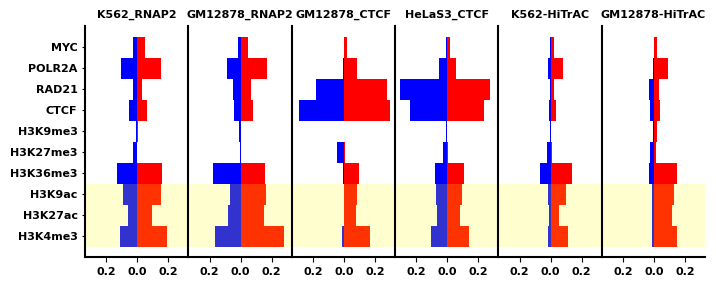

In [8]:
dfTL = pd.read_csv('figs/Ind/top_last.values.csv')

HM = ['H3K4me3','H3K27ac','H3K9ac','H3K36me3','H3K27me3','H3K9me3','CTCF','RAD21','POLR2A','MYC']
cells = ['K562_polr2a','GM12878_polr2a','GM12878_CTCF','HeLaS3_CTCF','K562','GM12878']
names = ['K562_RNAP2','GM12878_RNAP2','GM12878_CTCF','HeLaS3_CTCF','K562-HiTrAC','GM12878-HiTrAC']
highlight_hm = ['H3K4me3', 'H3K27ac', 'H3K9ac']

fig, axs = plt.subplots(1, 6, figsize=(8, 3), sharex=True, sharey=True)
for idx, ax in enumerate(axs):
    group = cells[idx]
    eachdf = dfTL[dfTL['Group'] == f'Group: {group}'][['HM','top','last']]
    eachdf.set_index('HM', inplace=True)
    eachdf = eachdf.reindex(HM)
    top_data = np.array(eachdf['top'].tolist())
    last_data = np.array(eachdf['last'].tolist())
    
    ax.barh(HM, -last_data, color='blue', height=1.0)
    ax.barh(HM, top_data, color='red', height=1.0)
    
    ax.set_title(f'{names[idx]}',fontsize=8,fontweight='bold')
    #ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{abs(float(x))}'))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{abs(float(x)):.1f}'))

    for hm in highlight_hm:
        y_index = HM.index(hm)
        ax.axhspan(y_index - 0.5, y_index + 0.5, facecolor='#fffd0c', alpha=0.2,edgecolor='none')
   
    ax.spines['top'].set_linewidth(0)   
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)  
    ax.spines['right'].set_linewidth(0)
    #ax.set_yticks([])
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(8)
        label.set_fontweight('bold')
    if idx > 0:
        ax.tick_params(axis='y', which='both', length=0, labelleft=False)
    else:
        ax.tick_params(axis='y', which='both', length=2, labelleft=True)
    # if idx > 0:
    #     ax.tick_params(axis='y', labelleft=False)
        #ax.tick_params(axis='y', labelleft=False)
    # if idx == 0:
    #     ax.tick_params(axis='y', labelbottom=True)  # 仅为第一个子图添加x轴标签
    # else:
    #     ax.tick_params(axis='y', labelbottom=False)  # 隐藏其他子图的x轴标签
 
# for i in range(1,6):
#     print(i)
#     axs[i].set_yticks([])
    
plt.subplots_adjust(wspace=0)
#plt.tight_layout()
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/Ind/top_last_histo.png',dpi=300, bbox_inches='tight')

plt.show()


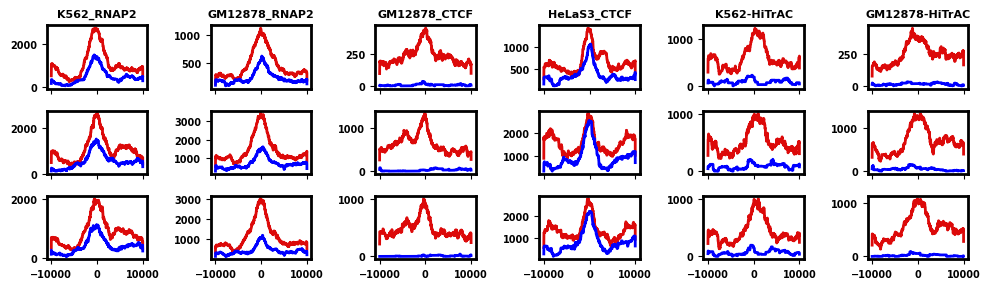

In [9]:

def calculate_signal_distribution(intersect_file, before_anchor=10000, after_anchor=10000):
    # 加载交集结果
    intersect_df = pd.read_csv(intersect_file, sep='\t', header=None)
    
    # 定义anchor区域范围
    region_length = before_anchor + after_anchor
    
    # 初始化信号分布数组
    signal_distribution = np.zeros(region_length)
    #count_distribution = np.zeros(region_length)
    
    # 计算每个anchor的信号分布
    for index, row in intersect_df.iterrows():
        anchor_start = row[1]  # anchor的起始位置
        anchor_end = row[2]  # anchor的结束位置
        h3k_start = row[4]  # H3K信号的起始位置
        h3k_end = row[5]  # H3K信号的结束位置
        signal_strength = row[9]  # 信号强度
        overlap_start = max(anchor_start, h3k_start)
        overlap_end = min(anchor_end, h3k_end)
        
        # 将信号分布到数组中
        anchor_center = (anchor_start + anchor_end) // 2
        relative_start = overlap_start - anchor_center + before_anchor
        relative_end = overlap_end - anchor_center + before_anchor

        for i in range(relative_start, relative_end):
            if 0 <= i < region_length:
                signal_distribution[i] += signal_strength
                #count_distribution[i] += 1  
    return signal_distribution

def smooth_signal(signal, window_size=10):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')


HMpath = 'binsFea/histoneMarks/anchor/HMoverlap/'
#HMs = ['H3K4me3','H3K27ac','H3K9ac','H3K36me3','H3K27me3','H3K9me3','CTCF','RAD21','POLR2A','MYC']
HMs = ['H3K4me3','H3K27ac','H3K9ac']
Samples = ['K562_polr2a','GM12878_polr2a','GM12878_CTCF','HeLaS3_CTCF','K562','GM12878']

before_anchor=10000
after_anchor=10000

x = np.arange(-before_anchor, after_anchor)

fig, axs = plt.subplots(len(HMs), len(Samples), sharex=True, figsize=(10,3)) 


for i in range(len(HMs)):#Samples
    for j in range(len(Samples)):#HMs
    
        topfile = HMpath+f'Top.{Samples[j]}.{HMs[i]}.intersect.bed'
        lastfile = HMpath+f'Last.{Samples[j]}.{HMs[i]}.intersect.bed'
        
        top_distribution = calculate_signal_distribution(topfile)
        lat_distribution = calculate_signal_distribution(lastfile)
        
        
        top_distribution_smoothed = smooth_signal(top_distribution)
        lat_distribution_smoothed = smooth_signal(lat_distribution)

        axs[i, j].plot(x, top_distribution_smoothed,label='top',color='#dc0a0a',linewidth=2)
        axs[i, j].plot(x, lat_distribution_smoothed,label = 'last',color='blue',linewidth=2)
        


        axs[i, j].spines['top'].set_linewidth(2)   
        axs[i, j].spines['bottom'].set_linewidth(2)
        axs[i, j].spines['left'].set_linewidth(2)  
        axs[i, j].spines['right'].set_linewidth(2) 
 

        for label in axs[i, j].get_xticklabels() + axs[i, j].get_yticklabels():
            label.set_fontsize(7)
            label.set_fontweight('bold')
    

names = ['K562_RNAP2','GM12878_RNAP2','GM12878_CTCF','HeLaS3_CTCF','K562-HiTrAC','GM12878-HiTrAC']

for i in range(1):#Samples
    for j in range(len(Samples)):#HMs
        axs[i, j].set_title(f'{names[j]}',fontsize=8,fontweight='bold')

# # 在每个子图上绘制数据
# for i in range(2):
#     for j in range(5):
#         if i == 0:
#             axs[i, j].plot(x, y1)  # 在第一行绘制正弦函数
#             axs[i, j].set_title(f'Subplot {i*5 + j+1}: sin(x)')
#         else:
#             axs[i, j].plot(x, y2)  # 在第二行绘制余弦函数
#             axs[i, j].set_title(f'Subplot {i*5 + j+1}: cos(x)')

# # 设置图表标题和标签
# for ax in axs.flat:
#     ax.set(xlabel='X-axis', ylabel='Y-axis')  # 设置共享的X和Y轴标签

# # 隐藏x标签和tick标签
# for ax in axs.flat:
#     ax.label_outer()

# 调整布局
#plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/Ind/top_last_plot.png',dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

